#  Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix

import joblib

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score

# Reading Data


In [2]:
pd.set_option('display.max_columns',None, 'display.max_colwidth', None)

In [3]:
df = pd.read_excel("divorce.xlsx")
ques = pd.read_excel("Divorce Questions.xlsx", header = None)

In [4]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


# Splitting Test and Train Data

In [5]:
x = df.iloc[:,0:53]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

# Feature Selection using KBest Algorithm

In [6]:
fs = SelectKBest(score_func=chi2, k= 10)

fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)



scores = pd.DataFrame(fs.scores_)
names = pd.DataFrame(X_train.columns)



features = pd.concat([names,scores],axis=1)
features.columns = ["names", "scores"]


    
features = features.sort_values(by= ['scores'],ascending=False)

features = features.head(10)

questions = []

for _ in range(len(features)):
    mask  = features.names.iloc[_]
    questions.append(ques[0].loc[ques[1] == mask])

    
questions = pd.Series(questions)    
questions = pd.DataFrame(questions)


features


,names,scores
35,Atr36,183.797065
34,Atr35,181.106124
39,Atr40,174.375947
37,Atr38,160.588721
8,Atr9,160.425659
18,Atr19,155.229166
16,Atr17,152.548781
10,Atr11,151.993322
4,Atr5,150.218797
19,Atr20,144.605114


# Creating DataFrame of Selected Features and Label


In [7]:
df1 = pd.DataFrame()

index = len(features.index)

for column in range(index):
    
    mask = features.iloc[column]
    df1[mask[0]] = df[mask[0]]
    df1["Class"] = df["Class"]
    
df1   

,Atr36,Class,Atr35,Atr40,Atr38,Atr9,Atr19,Atr17,Atr11,Atr5,Atr20
0,1,1,0,3,1,0,0,0,1,0,1
1,2,1,0,4,4,4,3,4,4,4,2
2,1,1,1,3,1,1,3,3,3,1,2
3,1,1,1,4,3,3,3,3,4,3,4
4,0,1,0,1,0,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0
166,1,0,1,1,1,0,0,0,0,0,0
167,0,0,0,2,1,0,0,0,0,0,1
168,0,0,0,1,0,0,0,0,0,0,0


# Splitting the Final Dataframe

In [8]:
x = df1.drop("Class", axis = 1)
y = df1["Class"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=15)

# Naive Bayes

In [29]:
mnb = MultinomialNB().fit(X_train, y_train) #MultiNomial Naive Bayes

mnb_score_test = mnb.score(X_test, y_test)
mnb_score_train = mnb.score(X_train, y_train)

print("score on test: " + str(mnb_score_test))
print("score on train: "+ str(mnb_score_train))

score on test: 0.6470588235294118
score on train: 0.7058823529411765


# Logistic Regression

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


lr_score_test = lr.score(X_test, y_test)
lr_score_train = lr.score(X_train, y_train)

print("score on test: " + str(lr_score_test))
print("score on train: "+ str(lr_score_train))

score on test: 0.9803921568627451
score on train: 0.9915966386554622


# K - Nearest Neighbour

In [11]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))

knn_score_test = knn.score(X_test, y_test)
knn_score_train = knn.score(X_train, y_train)


print("score on test: " + str(knn_score_test))
print("score on train: "+ str(knn_score_train))

train shape: (119, 10)
score on test: 0.9607843137254902
score on train: 0.9831932773109243


# Support Vector Machine

In [12]:
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)

svm_score_test = svm.score(X_test, y_test)
svm_score_train = svm.score(X_train, y_train)

print("score on test: " + str(svm_score_test))
print("score on train: "+ str(svm_score_train))

score on test: 0.6274509803921569
score on train: 0.7226890756302521


# Decision Tree Classifier

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_score_test = clf.score(X_test, y_test)
clf_score_train = clf.score(X_train, y_train)

print("score on test: "  + str(clf_score_test))
print("score on train: " + str(clf_score_train))

score on test: 0.9607843137254902
score on train: 1.0


# Bagging Classifier

In [14]:
# maX_samples: maXimum size 0.5=50% of each sample taken from the full dataset
# maX_features: maXimum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees


bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)

bg.fit(X_train, y_train)

bg_score_test = bg.score(X_test, y_test)
bg_score_train = bg.score(X_train, y_train)

print("score on test: " + str(bg_score_test))
print("score on train: "+ str(bg_score_train))

score on test: 0.9607843137254902
score on train: 0.9831932773109243


# Random Forest Classifier

In [15]:
# n_estimators = number of decision trees

rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(X_train, y_train)

rf_score_test = rf.score(X_test, y_test)
rf_score_train = rf.score(X_train, y_train)


print("score on test: " + str(rf_score_test))
print("score on train: "+ str(rf_score_train))

score on test: 0.9607843137254902
score on train: 0.9915966386554622


In [16]:
scores = [['Naive Bayes',mnb_score_test,mnb_score_train],
          ['Logistic Regression',lr_score_test,lr_score_train],
          ['KNN', knn_score_test,knn_score_train],
          ['SVM', svm_score_test,svm_score_train],
          ['Decision Tree Classifier', clf_score_test,clf_score_train],
          ['Bagging Classifier',bg_score_test,bg_score_train],
          ['Random Forest',rf_score_test,rf_score_train]]

score_df = pd.DataFrame(scores, columns = ['Model Name', 'TestScore' , 'TrainScore']) 

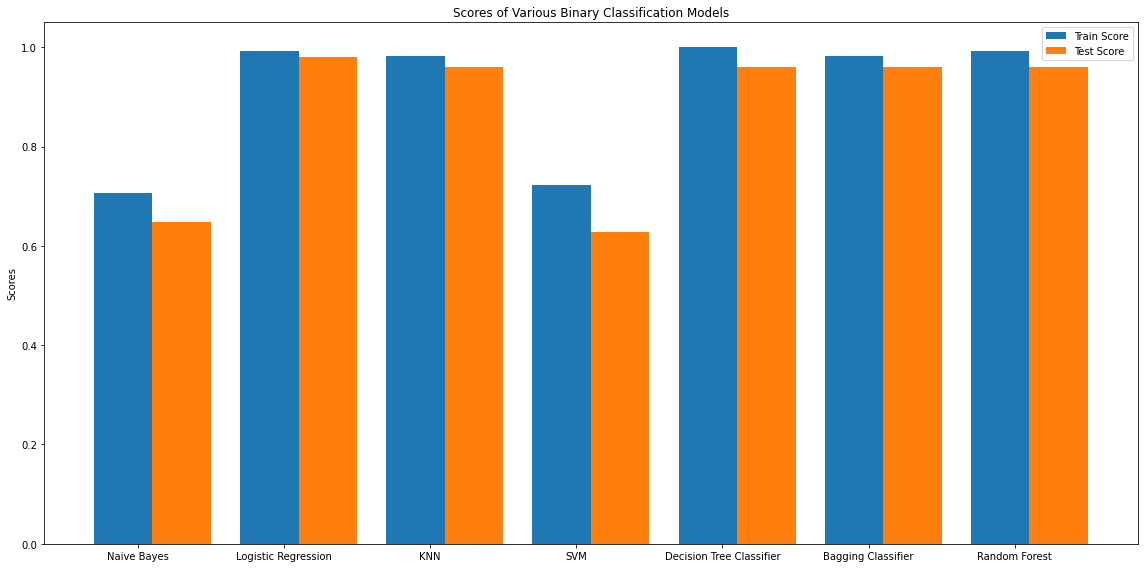

In [17]:
xpos = np.arange(7)

plt.figure(figsize =(16,8))

plt.xticks(xpos, score_df['Model Name'] )
plt.ylabel("Scores")
plt.title("Scores of Various Binary Classification Models")
testbar = plt.bar(xpos - 0.1, score_df['TrainScore'],width = 0.4, label = "Train Score")
trainbar = plt.bar(xpos + 0.3, score_df['TestScore'], width = 0.4, label = "Test Score")

plt.legend()

#tAKE COUNT

plt.tight_layout()
plt.show()


In [18]:
score_df.sort_values(by=["TestScore", "TrainScore"], ascending = False)

,Model Name,TestScore,TrainScore
1,Logistic Regression,0.980392,0.991597
4,Decision Tree Classifier,0.960784,1.000000
6,Random Forest,0.960784,0.991597
2,KNN,0.960784,0.983193
5,Bagging Classifier,0.960784,0.983193
0,Naive Bayes,0.647059,0.705882
3,SVM,0.627451,0.722689


# Creating Confusion Matrix

[[28  0]
 [ 2 21]]


C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


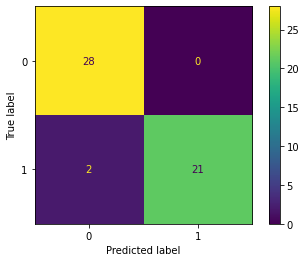

In [19]:
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_pred)


print(confusion_matrix(y_test, y_pred))


plot_confusion_matrix(rf, X_test, y_test)
plt.show()

# Saving the Model

In [20]:
joblib_file = "random_forest_divorce_predictor.pkl"
joblib.dump(rf, joblib_file)


['random_forest_divorce_predictor.pkl']

# The model is imported back again into the notebook just to check it.

In [21]:
# Load from file
joblib_model = joblib.load(joblib_file)

In [22]:
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 96.08 %


In [23]:
a = rf.predict([[4,4,4,3,1,4,1,4,2,0]])

C:\Users\harik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
a[0]

1

In [25]:
mnb_cv = cross_val_score(mnb,x,y).mean()
lr_cv  = cross_val_score(lr,x,y).mean()
knn_cv = cross_val_score(knn,x,y).mean()
clf_cv = cross_val_score(clf,x,y).mean()
svm_cv = cross_val_score(svm,x,y).mean()
bg_cv  = cross_val_score(bg,x,y).mean()
rf_cv  = cross_val_score(rf,x,y).mean()

In [26]:
cv = [['Naive Bayes',mnb_cv],
          ['Logistic Regression',lr_cv],
          ['KNN', knn_cv],
          ['SVM', svm_cv],
          ['Decision Tree Classifier', clf_cv],
          ['Bagging Classifier',bg_cv],
          ['Random Forest',rf_cv]]

cv_df = pd.DataFrame(cv, columns = ["Model Name", "Cv_scores"])

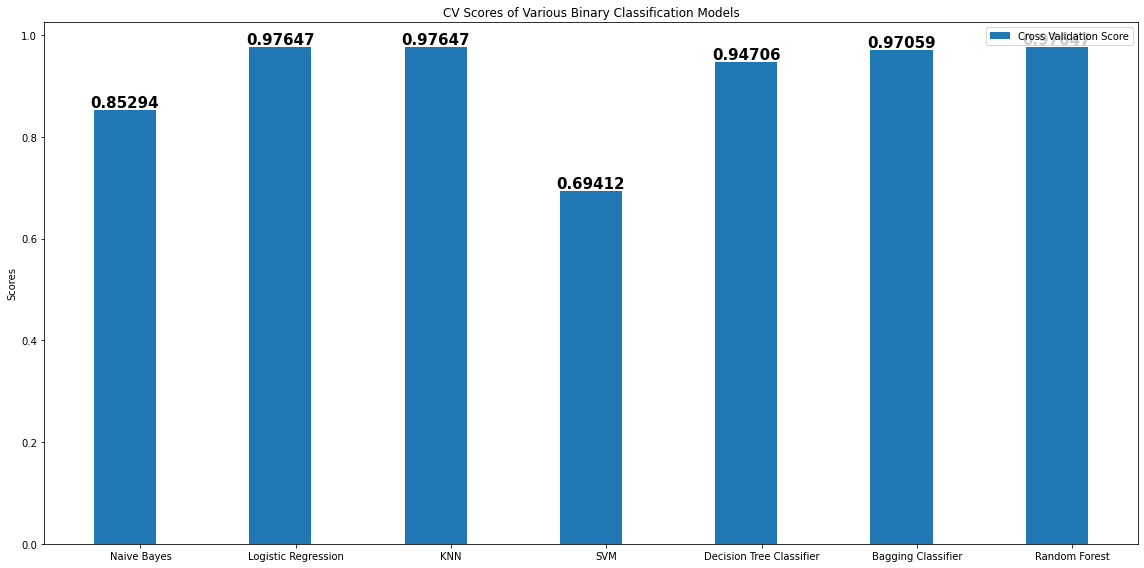

In [27]:
xpos = np.arange(7)

plt.figure(figsize =(16,8))

plt.xticks(xpos, cv_df['Model Name'] )
plt.ylabel("Scores")
plt.title("CV Scores of Various Binary Classification Models")
testbar = plt.bar(xpos - 0.1, cv_df['Cv_scores'],width = 0.4, label = "Cross Validation Score")


plt.legend()


for count,rect in enumerate(testbar):
    
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0,
             height,
             '%0.5f' % cv_df["Cv_scores"][count],
             ha='center',
             va='bottom',
             weight = "bold",
             fontsize = 15)
    
    
plt.tight_layout()
plt.show()

In [28]:
cv_df.sort_values(by=["Cv_scores"], ascending = False)

,Model Name,Cv_scores
1,Logistic Regression,0.976471
2,KNN,0.976471
6,Random Forest,0.976471
5,Bagging Classifier,0.970588
4,Decision Tree Classifier,0.947059
0,Naive Bayes,0.852941
3,SVM,0.694118
